# [프로젝트] 오염된 이미지 복원하기

In [3]:
import torch
import pickle
import matplotlib.pyplot as plt

import os
os.chdir('/aiffel/aiffel/study')

## 1. Data 불러오기

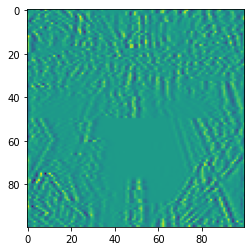

In [4]:
broken_image = torch.FloatTensor(pickle.load(open('./data/broken_image_t.p', 'rb'), encoding = 'latin1'))
plt.imshow(broken_image.view(100, 100))

## 2. 이미지 오염

In [ ]:
def weird_function(x, n_iter=5):
    h = x
    filt = torch.tensor([-1./3, 1./3, -1./3])
    for i in range(n_iter):
        zero_tensor = torch.tensor([1.0*0])
        h_l = torch.cat( (zero_tensor, h[:-1]), 0)
        h_r = torch.cat((h[1:], zero_tensor), 0 )
        h = filt[0] * h + filt[2] * h_l + filt[1] * h_r
        if i % 2 == 0:
            h = torch.cat( (h[h.shape[0]//2:],h[:h.shape[0]//2]), 0  )
    return h

## 3. 학습 Setting

In [6]:
def distance_loss(hypothesis, broken_image):
    return torch.dist(hypothesis, broken_image)

In [7]:
random_tensor = torch.randn(10000, dtype = torch.float)

## 4. 모델 학습

In [8]:
lr = 0.8
for i in range(0,20000):
    random_tensor.requires_grad_(True)
    hypothesis = weird_function(random_tensor)
    loss = distance_loss(hypothesis, broken_image)
    loss.backward()
    with torch.no_grad():
        random_tensor = random_tensor - lr*random_tensor.grad
    if i % 1000 == 0:
        print('Loss at {} = {}'.format(i, loss.item()))

Loss at 0 = 12.155352592468262
Loss at 1000 = 1.1249066591262817
Loss at 2000 = 0.5280385613441467
Loss at 3000 = 0.3666840195655823
Loss at 4000 = 0.29004448652267456
Loss at 5000 = 0.2425907999277115
Loss at 6000 = 0.20827138423919678
Loss at 7000 = 0.1809449940919876
Loss at 8000 = 0.1577836126089096
Loss at 9000 = 0.13728730380535126
Loss at 10000 = 0.11858594417572021
Loss at 11000 = 0.10114622116088867
Loss at 12000 = 0.08462665230035782
Loss at 13000 = 0.06879818439483643
Loss at 14000 = 0.05350351333618164
Loss at 15000 = 0.038632746785879135
Loss at 16000 = 0.02410954423248768
Loss at 17000 = 0.021161343902349472
Loss at 18000 = 0.021166548132896423
Loss at 19000 = 0.021167868748307228


## 5. 모델 테스트

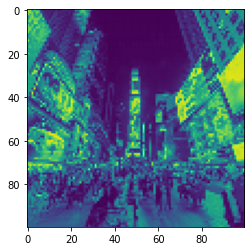

In [9]:
plt.imshow(random_tensor.view(100,100).data)